In [64]:
# Author: Hassan Ali
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [68]:
# Loading dataset from CSV
df = pd.read_csv('User_knowledge.csv')

# Work with a copy of the DataFrame to avoid chained assignment issues
df = df.copy()

# Replace categorical values in the 'UNS' column with numeric values.
# We first replace using a dictionary, then use infer_objects to prevent unwanted downcasting,
# and finally cast the result to int.
temp = df['UNS'].replace({'very_low': 0, 'Low': 1, 'Middle': 2, 'High': 3})
temp = temp.infer_objects(copy=False)
df['UNS'] = temp.astype(int)

# Verify the transformation by printing the first few rows
print(df.head())

    STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    3
2  0.06  0.06  0.05  0.25  0.33    1
3  0.10  0.10  0.15  0.65  0.30    2
4  0.08  0.08  0.08  0.98  0.24    1


/var/folders/3h/c2t_l2y13hb72x3mf8g1xf6w0000gn/T/ipykernel_78750/3594313977.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = df['UNS'].replace({'very_low': 0, 'Low': 1, 'Middle': 2, 'High': 3})


In [70]:
# Initializing the KMeans clustering algorithm with specific parameters:
# n_clusters=3: This indicates the number of clusters to form as well as the number of centroids to generate.
#               We are aiming to partition the data into 3 distinct groups.
# random_state=4: Ensures reproducibility of the results by using the same seed for initializing the centroids.
#                 This makes the algorithm's outputs consistent across different runs.
# n_init=10: Specifies that the k-means algorithm will run 10 times with different centroid seeds.
#            The best output in terms of inertia (within-cluster sum-of-squares) from these runs will be chosen.
#            This approach helps in achieving more robust results by mitigating the impact of initial centroid selection.
kmeans = KMeans(n_clusters=3, random_state=4, n_init=10)

In [72]:
# Applying the KMeans algorithm to assign each user to one of the 4 clusters based on their knowledge level.
y_kmeans = kmeans.fit_predict(df)

# Extracting the centroids for each cluster to analyze the characteristics of each group.
centroids = kmeans.cluster_centers_

In [74]:
# Adding a new column to the dataset to indicate the cluster each user belongs to, facilitating further analysis.
df.insert(0, "Cluster", y_kmeans, True)

In [76]:
print(df)

     Cluster   STG   SCG   STR   LPR   PEG  UNS
0          2  0.00  0.00  0.00  0.00  0.00    0
1          0  0.08  0.08  0.10  0.24  0.90    3
2          2  0.06  0.06  0.05  0.25  0.33    1
3          1  0.10  0.10  0.15  0.65  0.30    2
4          2  0.08  0.08  0.08  0.98  0.24    1
..       ...   ...   ...   ...   ...   ...  ...
253        0  0.61  0.78  0.69  0.92  0.58    3
254        1  0.78  0.61  0.71  0.19  0.60    2
255        0  0.54  0.82  0.71  0.29  0.77    3
256        1  0.50  0.75  0.81  0.61  0.26    2
257        0  0.66  0.90  0.76  0.87  0.74    3

[258 rows x 7 columns]


In [78]:
# Preparing data for agglomerative clustering by scaling features to have mean=0 and variance=1.
# This standardization is crucial for distance-based algorithms to perform correctly.
scaler = StandardScaler()
scaler.fit_transform(df)

# Computing the linkage matrix using the 'complete' method for hierarchical clustering.
# This method considers the maximum distance between objects in different clusters.
linkage_matrix = sch.linkage(df, method='complete')

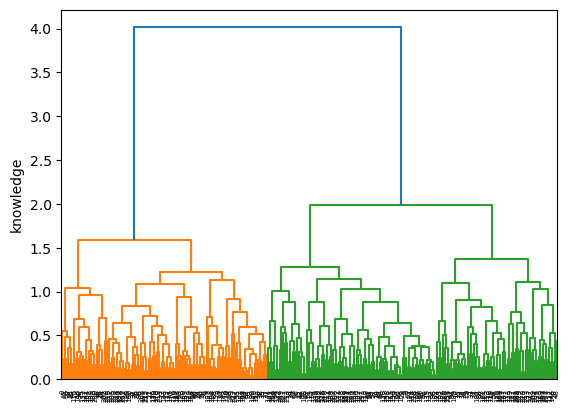

In [80]:
# Visualizing the hierarchical clustering as a dendrogram, which helps in understanding the data structure
# and deciding the number of clusters by visual inspection.
dendrogram = sch.dendrogram(linkage_matrix)
plt.ylabel('knowledge')
plt.savefig('dendrogram_uk.png', dpi=300)  # Saving the dendrogram for reporting purposes.

In [81]:
# Applying Agglomerative Clustering with 4 clusters as determined from prior knowledge and dendrogram analysis.
# The 'complete' linkage method is used, consistent with the dendrogram computation.
cluster = AgglomerativeClustering(n_clusters=4, linkage='complete')

# Fitting the model to the data and obtaining the cluster labels for each user.
cluster_preds = cluster.fit_predict(df)

# Printing the cluster labels for inspection.
print(cluster_preds)

[3 0 1 2 1 2 2 3 1 0 0 1 2 0 2 0 3 1 1 2 1 2 2 1 1 0 3 1 0 0 2 1 1 0 0 1 1
 1 3 2 1 0 2 2 3 2 2 0 0 2 1 2 1 0 2 1 2 2 0 1 1 2 2 1 2 3 3 2 1 2 2 0 3 2
 0 3 1 1 3 1 1 2 2 1 1 3 0 1 1 2 2 2 3 1 0 1 1 0 2 1 1 0 2 1 1 2 2 2 2 0 1
 1 0 0 2 2 3 0 2 0 1 1 1 2 0 0 0 1 1 2 1 2 3 0 2 2 1 1 2 1 3 2 2 1 2 0 1 3
 1 0 0 1 3 1 2 2 2 0 2 2 1 2 0 0 3 0 2 0 1 0 1 2 0 1 2 1 1 0 2 0 1 0 0 1 1
 1 0 2 1 0 2 0 2 0 2 1 3 1 2 3 3 2 3 1 0 1 2 2 3 0 2 2 0 2 2 1 1 0 2 1 1 2
 2 2 1 0 2 1 0 0 2 1 1 0 2 1 1 0 2 2 1 0 2 1 2 0 2 1 0 2 2 2 1 0 2 0 2 0]


In [82]:
# Importing necessary metrics from scikit-learn to evaluate clustering performance
from sklearn.metrics import adjusted_rand_score, silhouette_score

# we extract these labels into a variable for comparison.
true_labels = df['UNS'].values

# For K-Means: 
# Assuming y_kmeans contains the cluster labels predicted by the K-Means algorithm.
kmeans_labels = y_kmeans

# The Adjusted Rand Index (ARI) computes a similarity measure between two clusters by considering all pairs of samples 
# and counting pairs that are assigned in the same or different clusters in the predicted and true clusters. 
# The ARI score has a range of -1 to 1. A score of 1 indicates perfect matching of clusters, 
# while a score of 0 or less indicates random or independent assignments.
# Here, we calculate ARI for K-Means clustering compared to true labels.
ari_kmeans = adjusted_rand_score(true_labels, kmeans_labels)
print(f"Adjusted Rand Index for K-Means: {ari_kmeans}")

# The Silhouette Score is used to calculate the mean intra-cluster distance between points, 
# and the mean nearest-cluster distance for each sample, which provides a silhouette coefficient for each sample. 
# This score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster 
# and poorly matched to neighboring clusters. 
# If many points have a high value, the clustering configuration is appropriate. 
# If many points have a low or negative value, the clustering configuration may have too many or too few clusters.
# The Silhouette Score is calculated for K-Means clustering here.
silhouette_kmeans = silhouette_score(df.drop(['Cluster'], axis=1), kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

# For Agglomerative Clustering: 
agglo_labels = cluster_preds

# Calculating Adjusted Rand Index (ARI) for Agglomerative Clustering compared to true labels.
ari_agglo = adjusted_rand_score(true_labels, agglo_labels)
print(f"Adjusted Rand Index for Agglomerative Clustering: {ari_agglo}")

# Calculating Silhouette Score for Agglomerative Clustering.
silhouette_agglo = silhouette_score(df.drop(['Cluster'], axis=1), agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_agglo}")



Adjusted Rand Index for K-Means: 0.8614404265792106
Silhouette Score for K-Means: 0.4656433939582956
Adjusted Rand Index for Agglomerative Clustering: 1.0
Silhouette Score for Agglomerative Clustering: 0.4939557402070606
